In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('salary.csv')
df

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.0,73862.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.0,74628.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0
...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,74628.0,74628.0
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,WATER MGMNT,73216.0,66764.0
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,77238.0,77238.0
34216,"ZYSKO, RICHARD",LIEUTENANT,FIRE,101958.0,101958.0


In [9]:
df['DEPARTMENT'].unique()

array(['WATER MGMNT', 'POLICE', 'FLEET MANAGEMNT', 'FIRE',
       'FAMILY & SUPPORT', 'TRANSPORTN', 'STREETS & SAN', 'REVENUE',
       'BUSINESS AFFAIRS', 'COMMUNITY DEVELOPMENT', 'OEMC', 'HEALTH',
       'ENVIRONMENT', 'GENERAL SERVICES', 'AVIATION', 'LAW',
       'PUBLIC LIBRARY', 'ADMIN HEARNG', 'CULTURAL AFFAIRS', 'BUILDINGS',
       'FINANCE', 'CITY COUNCIL', 'ANIMAL CONTRL', 'CITY CLERK',
       'BOARD OF ELECTION', 'COMPLIANCE', 'HUMAN RESOURCES', 'TREASURER',
       'DISABILITIES', 'IPRA', "MAYOR'S OFFICE", 'DoIT', 'PROCUREMENT',
       'HUMAN RELATIONS', 'INSPECTOR GEN', 'BOARD OF ETHICS',
       'BUDGET & MGMT', 'POLICE BOARD', 'LICENSE APPL COMM'], dtype=object)

In [10]:
df['JOB TITLE'].unique()

array(['WATER RATE TAKER', 'POLICE OFFICER', 'CHIEF CONTRACT EXPEDITER',
       ..., 'CASE ANALYST - LAW', 'OPERATIONS ANALYST',
       'MECHANICAL ENGINEER IV'], dtype=object)

In [11]:
df.isnull().sum()

NAME                                       0
JOB TITLE                                  0
DEPARTMENT                                 0
EMPLOYEE ANNUAL SALARY                     0
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    0
dtype: int64

according to this data we can make the DEPARTMENT column as our target label.

In [12]:
le=LabelEncoder()
df['DEPARTMENT']=le.fit_transform(df['DEPARTMENT'])
df

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,38,81000.0,73862.0
1,"AARON, JEFFERY M",POLICE OFFICER,30,74628.0,74628.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,19,77280.0,70174.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,38,96276.0,96276.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,38,84032.0,76627.0
...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,30,74628.0,74628.0
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,38,73216.0,66764.0
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,30,77238.0,77238.0
34216,"ZYSKO, RICHARD",LIEUTENANT,18,101958.0,101958.0


In [13]:
df['DEPARTMENT'].unique()

array([38, 30, 19, 18, 16, 36, 35, 34,  7, 10, 29, 21, 15, 20,  2, 26, 33,
        0, 12,  6, 17,  9,  1,  8,  3, 11, 23, 37, 13, 25, 28, 14, 32, 22,
       24,  4,  5, 31, 27])

THERE ARE 38 MULTIPLE CATEGORIES ARE PRESENT IN THE DATASET WHICH ARE CONSIDERED TO BE OUR TARGET LABEL.

In [14]:
df.drop(['NAME'],axis=1,inplace=True)

In [15]:
df

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,WATER RATE TAKER,38,81000.0,73862.0
1,POLICE OFFICER,30,74628.0,74628.0
2,CHIEF CONTRACT EXPEDITER,19,77280.0,70174.0
3,CIVIL ENGINEER IV,38,96276.0,96276.0
4,ELECTRICAL MECHANIC,38,84032.0,76627.0
...,...,...,...,...
34213,POLICE OFFICER,30,74628.0,74628.0
34214,CONSTRUCTION LABORER,38,73216.0,66764.0
34215,POLICE OFFICER,30,77238.0,77238.0
34216,LIEUTENANT,18,101958.0,101958.0


In [16]:
df.dtypes

JOB TITLE                                   object
DEPARTMENT                                   int32
EMPLOYEE ANNUAL SALARY                     float64
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    float64
dtype: object

In [17]:
df.describe()

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
count,34218.000000,34218.000000,34218.000000
mean,26.016921,73828.763341,72032.171518
std,8.912667,22778.636848,22109.779752
min,0.000000,1.000000,1.000000
25%,18.000000,67224.000000,64248.000000
50%,30.000000,77238.000000,76627.000000
75%,30.000000,84032.000000,82878.000000
max,38.000000,260004.000000,236096.000000


In [18]:
df.drop(['JOB TITLE'],axis=1,inplace=True)

In [19]:
df

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,38,81000.0,73862.0
1,30,74628.0,74628.0
2,19,77280.0,70174.0
3,38,96276.0,96276.0
4,38,84032.0,76627.0
...,...,...,...
34213,30,74628.0,74628.0
34214,38,73216.0,66764.0
34215,30,77238.0,77238.0
34216,18,101958.0,101958.0


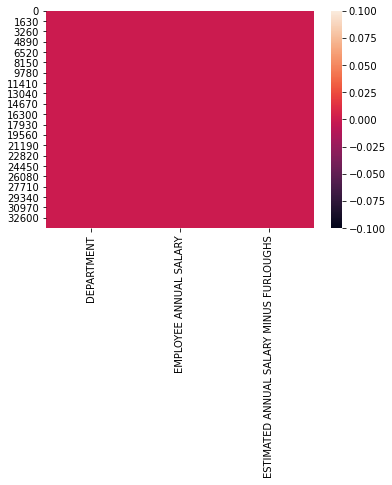

In [20]:
sns.heatmap(df.isnull())

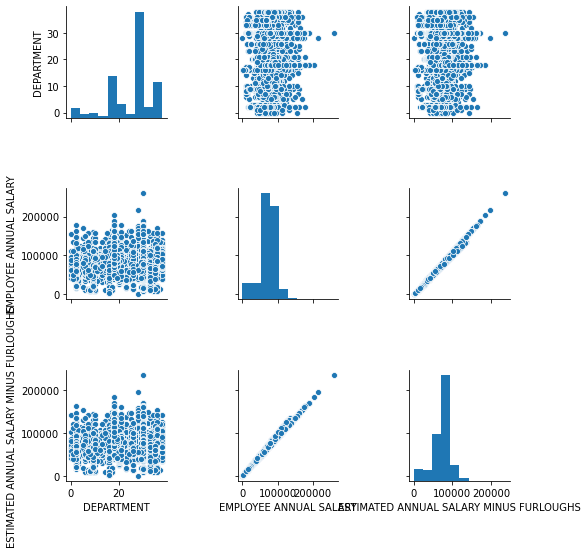

In [21]:
sns.pairplot(df)

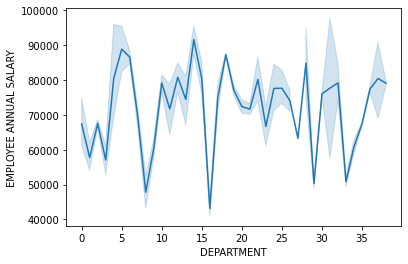

In [22]:
sns.lineplot(x='DEPARTMENT',y='EMPLOYEE ANNUAL SALARY',data=df)

DEPARTMENT                                    AxesSubplot(0.125,0.536818;0.352273x0.343182)
EMPLOYEE ANNUAL SALARY                     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS          AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

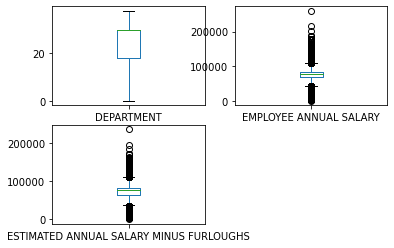

In [23]:
df.plot(kind='box',subplots=True,layout=(2,2))

this indicates that there are outliers present in our dataset.

In [24]:
dfcorr=df.corr()
dfcorr

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
DEPARTMENT,1.000000,-0.020931,-0.012801
EMPLOYEE ANNUAL SALARY,-0.020931,1.000000,0.990208
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,-0.012801,0.990208,1.000000


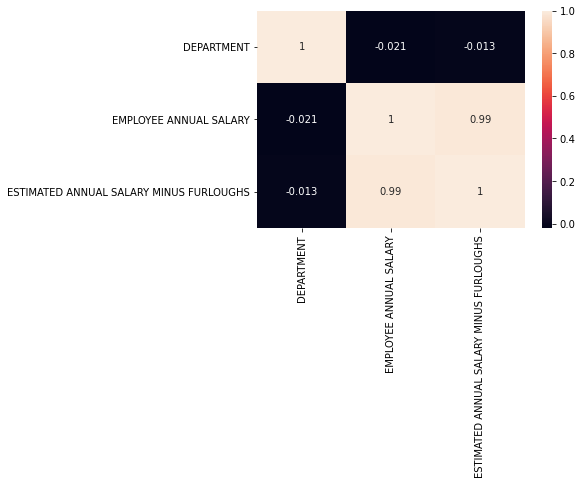

In [25]:
sns.heatmap(dfcorr,annot=True)

In [26]:
df.skew()

DEPARTMENT                                -1.065106
EMPLOYEE ANNUAL SALARY                    -0.571787
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS   -0.686903
dtype: float64

# removing the outliers

In [27]:
threshold=3
z=abs(zscore(df))

In [28]:
z

array([[1.34451942, 0.31482751, 0.08276225],
       [0.44690744, 0.03508763, 0.11740806],
       [0.78730904, 0.15151421, 0.0840442 ],
       ...,
       [0.44690744, 0.14967035, 0.2354571 ],
       [0.89951053, 1.23491357, 1.3535307 ],
       [1.34831652, 1.60342213, 1.27424337]])

In [29]:
df_new=df[(z<3).all(axis=1)]

In [30]:
df_new

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,38,81000.0,73862.0
1,30,74628.0,74628.0
2,19,77280.0,70174.0
3,38,96276.0,96276.0
4,38,84032.0,76627.0
...,...,...,...
34213,30,74628.0,74628.0
34214,38,73216.0,66764.0
34215,30,77238.0,77238.0
34216,18,101958.0,101958.0


In [31]:
df.shape

(34218, 3)

In [32]:
df_new.shape

(33805, 3)

In [33]:
df=df_new

# performing the model.

In [34]:
x=df.drop('DEPARTMENT',axis=1)

In [35]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.34159838,  0.08828641],
       [ 0.0411782 ,  0.12508576],
       [ 0.16621184, -0.08888853],
       ...,
       [ 0.16423167,  0.25047257],
       [ 1.32970354,  1.43804428],
       [ 1.72545479,  1.35382853]])

In [36]:
pd.DataFrame(x)

,0,1
0,0.341598,0.088286
1,0.041178,0.125086
2,0.166212,-0.088889
3,1.061815,1.165076
4,0.484548,0.221120
...,...,...
33800,0.041178,0.125086
33801,-0.025393,-0.252708
33802,0.164232,0.250473
33803,1.329704,1.438044


In [37]:
y=df.iloc[:,-3]

In [38]:
y.shape

(33805,)

In [39]:
x.shape

(33805, 2)

In [45]:
max_r_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    le=LinearRegression()
    le.fit(x_train,y_train)
    predle=le.predict(x_test)
    R2_score=r2_score(y_test,predle)
    if R2_score>max_r_score:
        max_r_score=R2_score
        final_r_state=r_state
print('the maximum r2_score to',final_r_state,'is',max_r_score)

the maximum r2_score to 97 is 0.007568168336122283


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.48661440615293594
[[  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0  73]
 ...
 [  0   0   0 ...   0   0 153]
 [  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0 245]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00       252
           3       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        81
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         4
          14       0.00      0.